In [1]:
import numpy as np
from scipy import signal
from dslrpp.tools.align import LCT
from astropy.io import fits
from matplotlib import pyplot as plt

i1 = fits.open("../test_slike/lcttest/12282-071_R.fit")
i2 = fits.open("../test_slike/lcttest/12282-072_R.fit")
i3 = fits.open("../test_slike/lcttest/12282-073_R.fit")
i4 = fits.open("../test_slike/lcttest/12282-074_R.fit")

i1 = i1[0].data[900:1148, 900:1148]
i2 = i2[0].data[900:1148, 900:1148]
i3 = i3[0].data[900:1148, 900:1148]
i4 = i4[0].data[900:1148, 900:1148]

In [2]:
def LCT(img1, img2, corrmode='same'):
    img1 = img1.astype('float')
    img1 /= img1.max()
    print('norm1')
    img2 = img2.astype('float')
    img2 /= img2.max()
    print('norm2')
    corr = signal.correlate2d(img1, img2, mode=corrmode)
    plt.imshow(corr[114:134, 114:134])
    plt.colorbar()
    plt.show()
    maxi = np.argmax(np.fabs(corr))
    x, y = np.unravel_index(maxi, corr.shape)
    y -= (len(img1)//2 - 1)
    x -= (len(img1[0])//2 - 1)
    return x, y

print("...""...""")

......


norm1
norm2


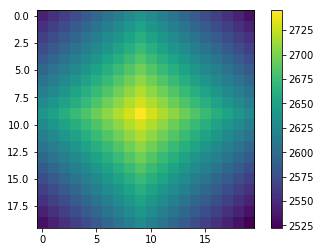

(0, 0)


In [3]:
a=LCT(i1, i2)
print(a)

norm1
norm2


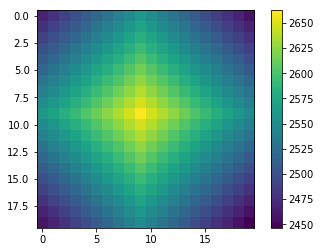

(0, 0)


In [4]:
b = LCT(i2, i3)
print(b)

norm1
norm2
norm3


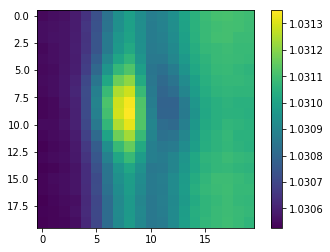

In [8]:
img1 = i1.astype('float')
img1 /= img1.max()
print('norm1')
img2 = i2.astype('float')
img2 /= img2.max()
print('norm2')
img3 = i3.astype('float')
img3 /= img3.max()
print('norm3')
corr = signal.correlate2d(img1, img2, mode='same')
corr1 = signal.correlate2d(img2, img3, mode='same')
plt.imshow(corr[114:134, 114:134]/corr1[114:134, 114:134])
plt.colorbar()
plt.show()

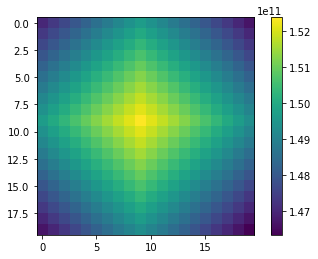

In [11]:
corrs = signal.correlate2d(corr, corr1, mode='same')
plt.imshow(corrs[114:134, 114:134])
plt.colorbar()
plt.show()